In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ARDRegression, TweedieRegressor, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import joblib

In [3]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format',lambda x: '%.3f' % x)


In [4]:
df = pd.read_csv('health_insurance.csv')
df.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.000,male,64,24.300,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600
1,49.000,female,75,22.600,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000
2,32.000,female,64,17.800,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200
3,61.000,female,53,36.400,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600
4,19.000,female,50,20.600,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700


In [5]:
df.shape


(15000, 13)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [7]:
df.describe()


,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000,15000.000,14044.000,15000.000,15000.000,15000.000,15000.000,15000.000,15000.000
mean,39.548,64.910,30.266,1.130,0.198,68.650,0.777,0.224,13401.438
std,14.016,13.702,6.123,1.228,0.399,19.419,0.416,0.417,12148.240
min,18.000,34.000,16.000,0.000,0.000,0.000,0.000,0.000,1121.900
25%,27.000,54.000,25.700,0.000,0.000,64.000,1.000,0.000,4846.900
50%,40.000,63.000,29.400,1.000,0.000,71.000,1.000,0.000,9545.650
75%,52.000,76.000,34.400,2.000,0.000,80.000,1.000,0.000,16519.125
max,64.000,95.000,53.100,5.000,1.000,122.000,1.000,1.000,63770.400


In [8]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['age'].fillna(df['age'].mode()[0],inplace=True)


In [9]:
df.isnull().sum()


age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [10]:
df[df.duplicated()]


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
605,46.000,female,68,30.266,NoDisease,2,0,LosAngeles,60,1,0,Dancer,8825.100
608,27.000,female,82,30.266,NoDisease,3,0,Oceanside,82,1,1,Architect,18804.800
898,48.000,female,67,33.100,Alzheimer,0,1,Cincinnati,70,1,0,ITProfessional,40974.200
919,26.000,male,56,23.700,NoDisease,2,0,Kingman,72,1,0,HomeMakers,3484.300
970,48.000,female,70,28.900,NoDisease,1,0,KanasCity,72,0,0,Architect,9249.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,46.000,male,46,22.300,NoDisease,0,0,Louisville,72,1,0,Academician,7147.100
14971,18.000,female,53,27.300,NoDisease,3,1,Boston,85,1,0,Student,18223.500
14987,47.000,male,94,47.500,NoDisease,1,0,Raleigh,61,1,0,Academician,8083.900
14989,44.000,male,90,38.100,NoDisease,1,0,Georgia,76,1,0,Engineer,7152.700


In [11]:
df['hereditary_diseases'].unique()


array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [12]:
df['city'].nunique()


91

In [13]:
df['job_title'].value_counts().head()


job_title
Student       1320
HomeMakers     972
Singer         744
Actor          720
FilmMaker      714
Name: count, dtype: int64

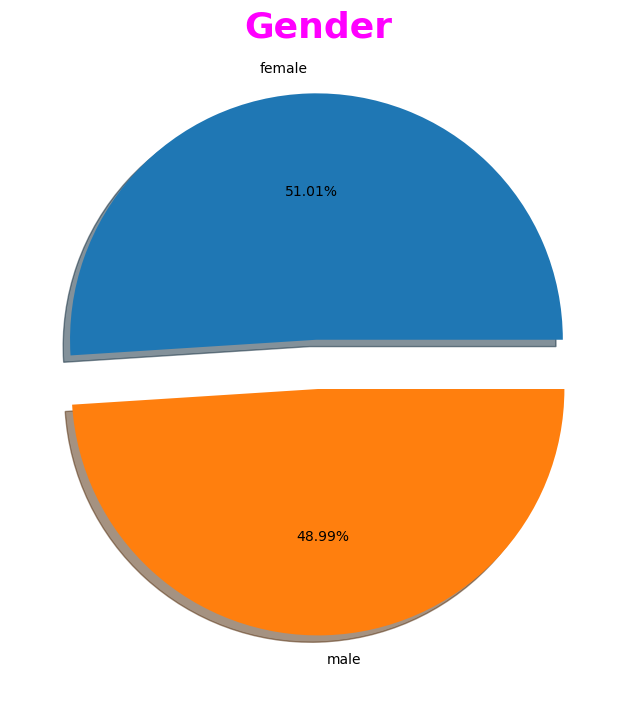

In [14]:
values = df.sex.value_counts().values
labels = ['female','male']
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
plt.title('Gender',pad=32,fontsize=26,fontweight='bold',color='fuchsia')
plt.show()


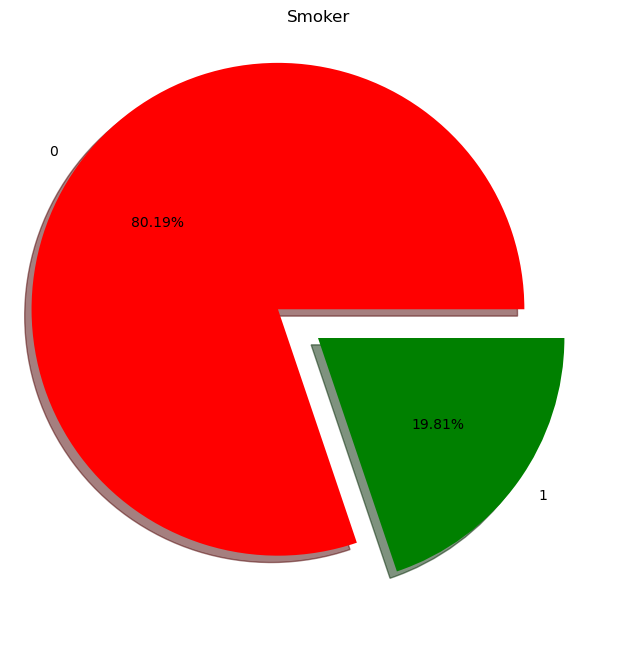

In [16]:
values = df.smoker.value_counts().values
labels = df.smoker.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['red','green'])
plt.title('Smoker')
plt.show()


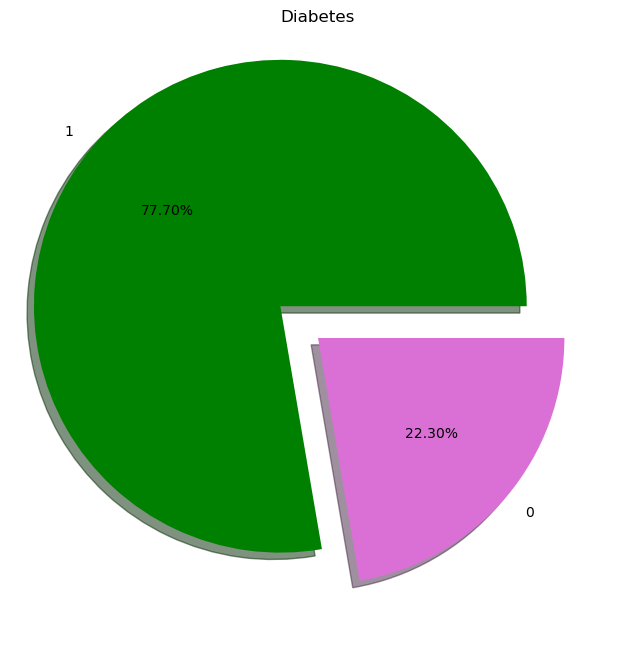

In [24]:
values = df.diabetes.value_counts().values
labels = df.diabetes.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['green','orchid'])
plt.title('Diabetes')
plt.show()


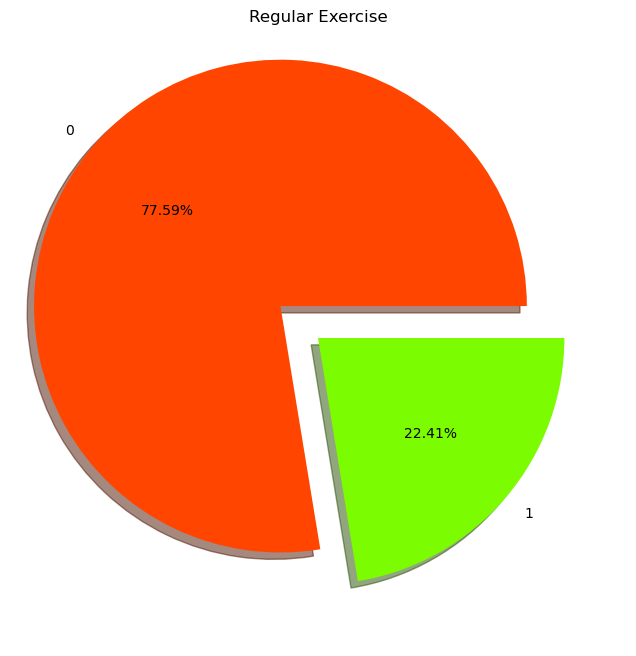

In [18]:
values = df.regular_ex.value_counts().values
labels = df.regular_ex.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['orangered','lawngreen'])
plt.title('Regular Exercise')
plt.show()


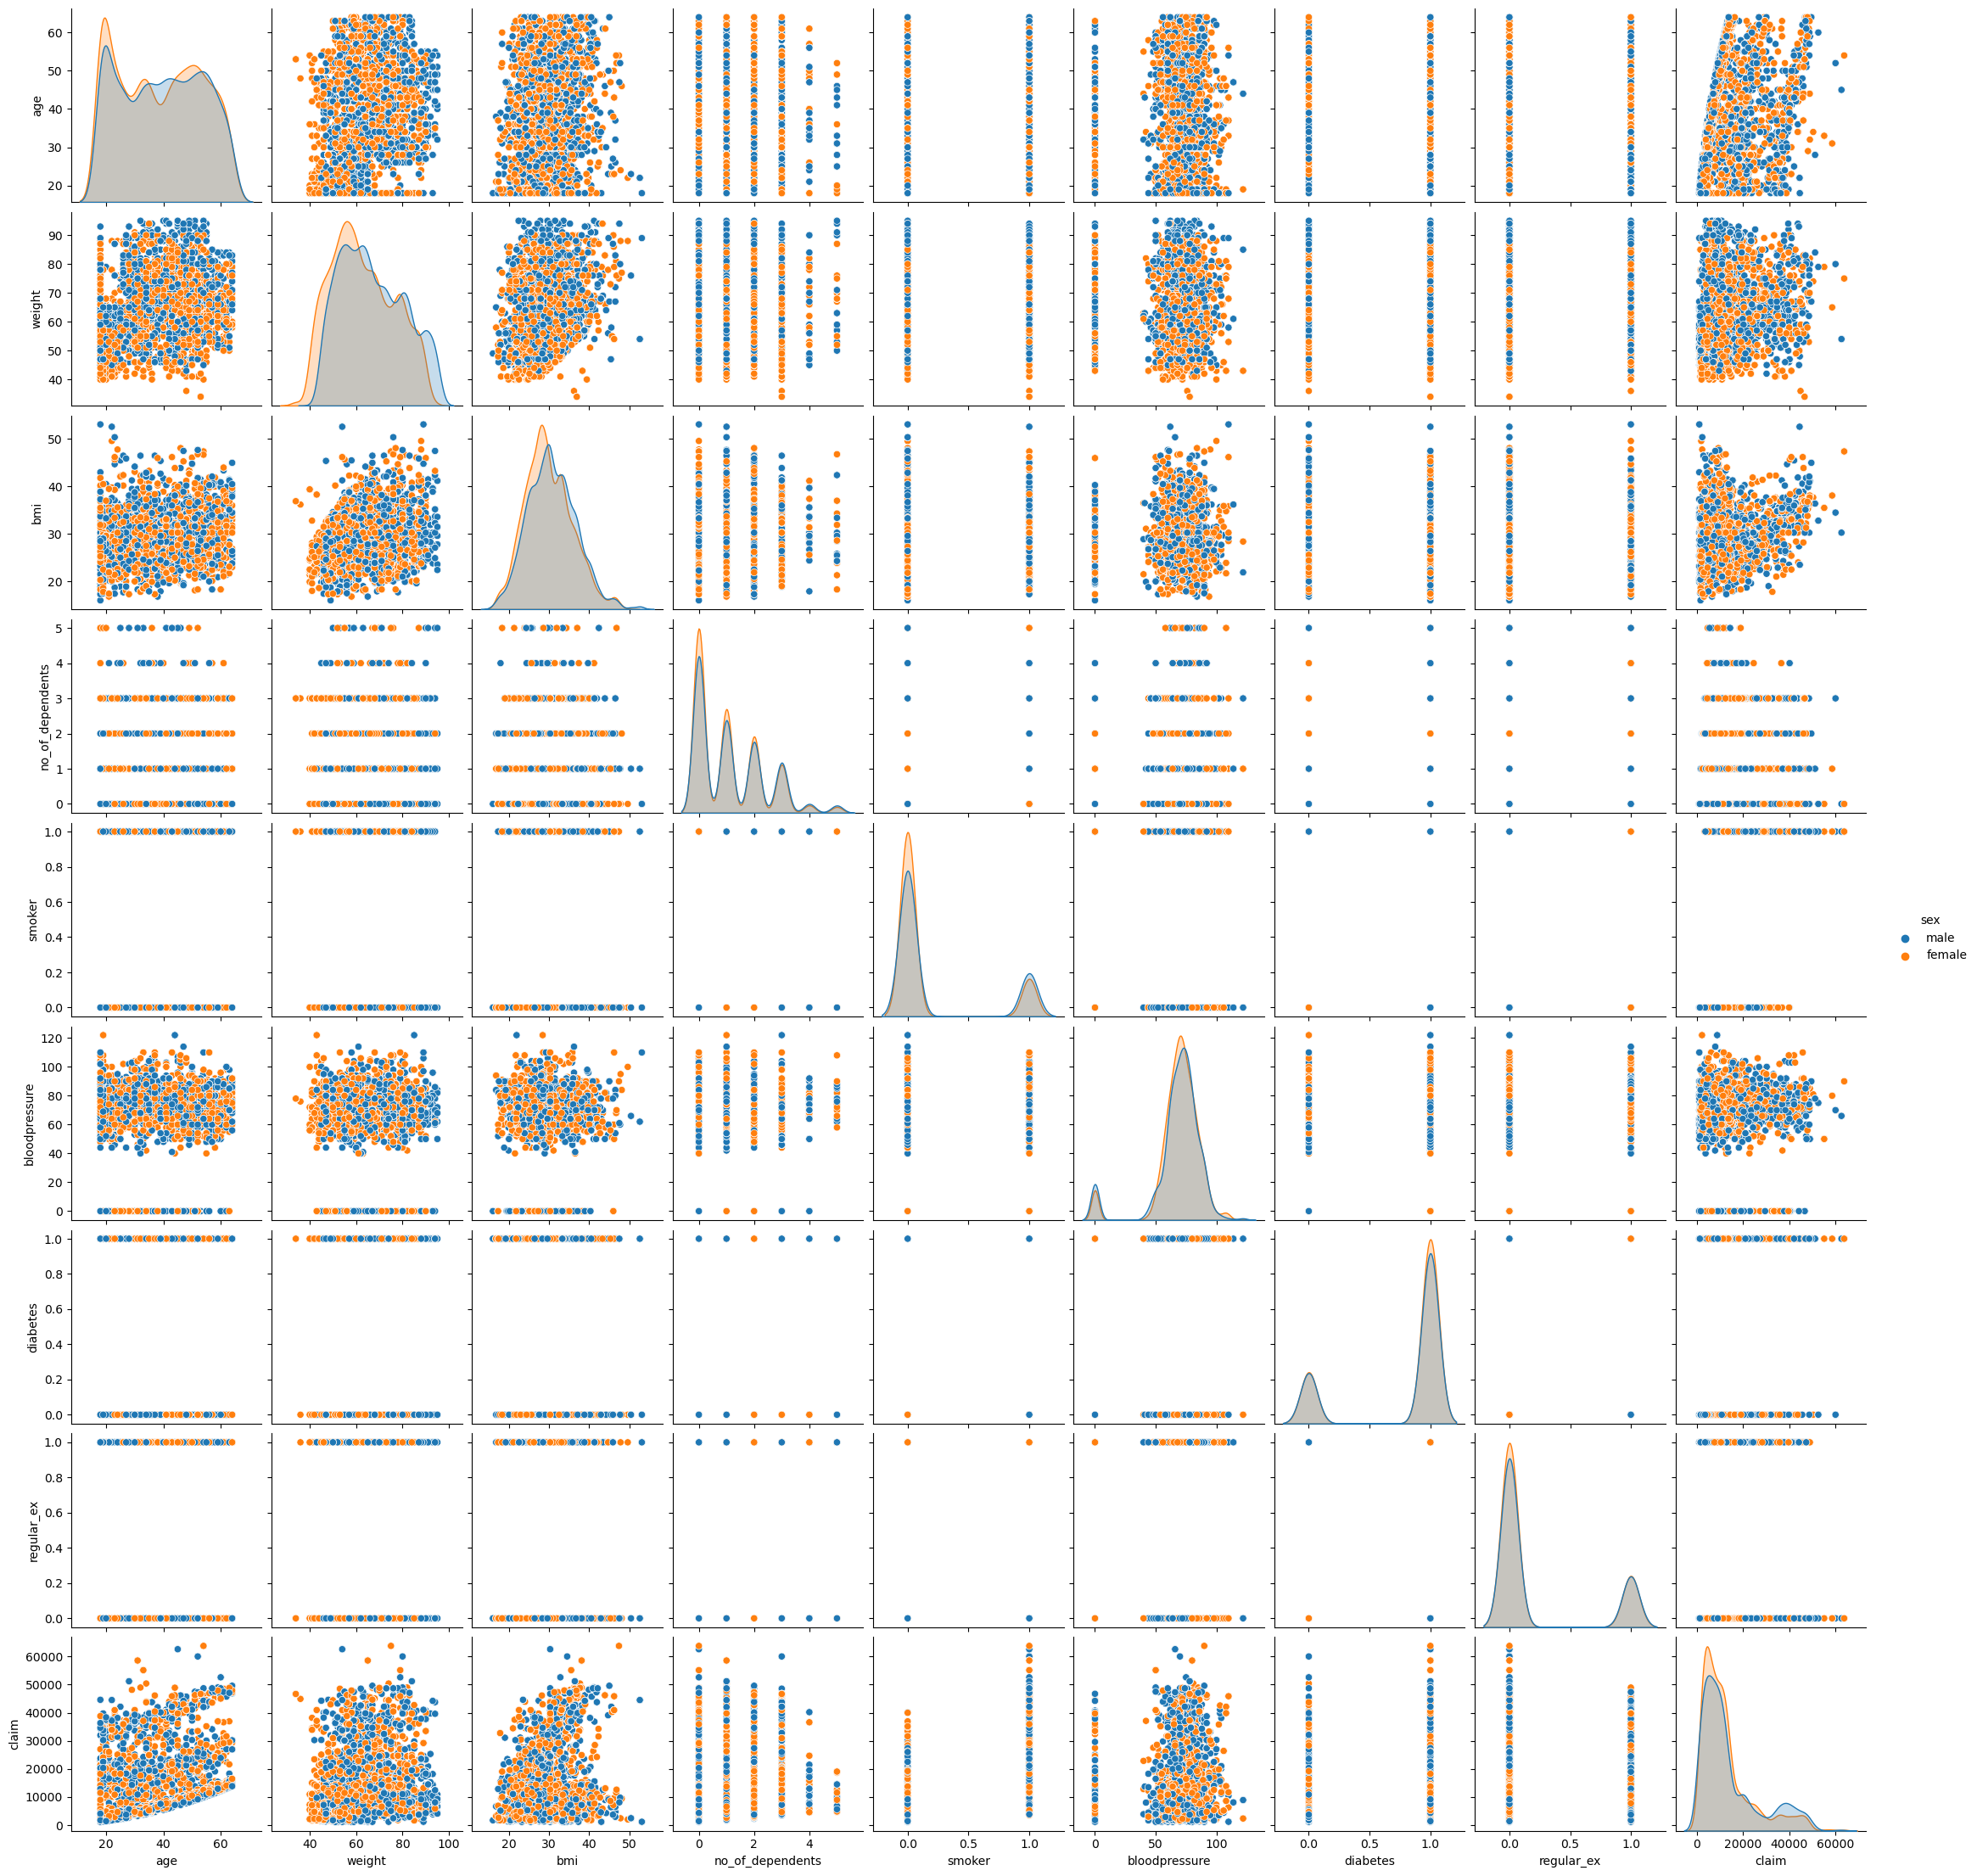

In [29]:
sns.pairplot(df,hue='sex')

In [30]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

ValueError: could not convert string to float: 'male'

In [ ]:
job_titles_bmi = df.groupby('job_title')['bmi'].mean().sort_values(ascending=False).reset_index()[:10]
job_titles_bmi


In [ ]:
sns.barplot(x='bmi',y='job_title',data=job_titles_bmi,palette='rainbow',orient='horizontal')


In [ ]:
job_titles_bmi = df.groupby('job_title')['bmi'].max().sort_values(ascending=False).reset_index()[:10]
job_titles_bmi


In [ ]:
sns.barplot(x='job_title',y='bmi',data=job_titles_bmi,palette='crest')
plt.xticks(rotation=20)
plt.title('Job professionals with highest BMI')


In [ ]:
job_titles_bmi = job_titles_bmi = df.groupby('job_title')['bmi'].min().sort_values().reset_index()[:10]
job_titles_bmi


In [ ]:
sns.barplot(x='job_title',y='bmi',data=job_titles_bmi,palette='winter')


In [ ]:
plt.figure(figsize=(20,10))
pd.crosstab(index=df.job_title,columns=df.sex,values=df.claim,normalize='index',aggfunc='mean').plot.bar(stacked=True,color=['crimson','royalblue'])
plt.ylabel('claim')
plt.legend(bbox_to_anchor=(1.2,0.5),title='sex')

In [ ]:
sns.countplot(df.hereditary_diseases)


In [ ]:
plt.figure(figsize=(20,10))
pd.crosstab(index=df.age,columns=df.smoker,values=df.claim,aggfunc='mean',normalize='index').plot.bar(stacked=True,color=['red','green'])
plt.ylabel('claim')
plt.legend(bbox_to_anchor=(1.2,0.5),title='smoker')


In [ ]:
sns.boxplot(df.claim)


In [ ]:
ax = sns.barplot(x='sex',y='claim',data=df)


In [ ]:
sns.barplot(x='smoker',y='claim',data=df)


In [ ]:
sns.stripplot(x='regular_ex',y='claim',data=df,hue='sex')


In [ ]:
sns.violinplot(x='diabetes',y='claim',data=df,hue='sex')


In [ ]:
df.sex.replace(['female','male'],[0,1],inplace=True)
df.sex = df.sex.astype(int)


In [ ]:
df.info()


In [ ]:
df.sex.replace(['female','male'],[0,1],inplace=True)
df.sex = df.sex.astype(int)

In [ ]:
df.info()


In [ ]:
le = LabelEncoder()
df.city = le.fit_transform(df.city)
df.city = df.city.astype(int)
df.job_title = le.fit_transform(df.job_title)
df.job_title = df.job_title.astype(int)
df.hereditary_diseases = le.fit_transform(df.hereditary_diseases)
df.hereditary_diseases = df.hereditary_diseases.astype(int)


In [ ]:
scaler = StandardScaler()
features = df.columns
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=features)
scaled_df.head()
